### Test hirarchical clustering and consensus functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from clustertools.load_data import load_fuzzy_data
from scipy.spatial import distance
from copy import deepcopy
from timeit import default_timer as timer
from datetime import timedelta
import importlib
%matplotlib inline

In [2]:
from clustertools.models import consensus
from clustertools.models import similarity
from clustertools.models import density
from clustertools.models import distance as cl_dist

In [3]:
#importlib.reload(consensus)

In [4]:
fuzzy = load_fuzzy_data()
len(fuzzy)

2309

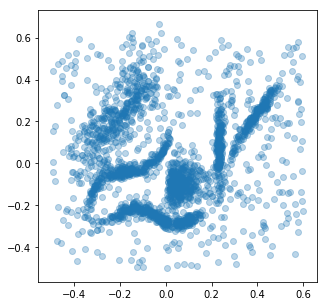

In [5]:
plt.figure(figsize=(5, 5))
plt.scatter(fuzzy[:,0], fuzzy[:,1],alpha=.3)

In [6]:
fuzzy_copy = deepcopy(fuzzy)
np.random.shuffle(fuzzy)

Set some parameters

In [7]:
k = 10 # number of clusters to go down to
stop_dist = 0.3
num_stop_crit = 1
stride = 2
data = fuzzy[::stride]
n = len(data) # number of data points
print(n)
link = 'average'
#link = 'complete'
#link = 'single'
metric='euclidean'

1155


Fit hierarchical clustering object and plot results

Hierarchical clustering terminated.
Finished after 0:00:05.574189
Stopping cluster number was reached.
Current number of clusters: 10
Current minimum cluster distance: 0.28


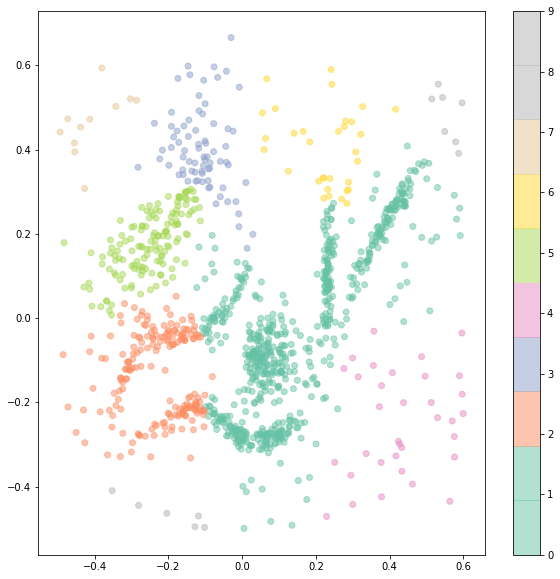

In [8]:
hiercl_obj = similarity.HierarchicalClustering(data, link=link, num_stop_crit=num_stop_crit, metric=metric, k=k, stop_dist=stop_dist)
hiercl_obj.fit()
labels = hiercl_obj.cluster_labels
plt.figure(figsize=(10, 10))
plt.scatter(fuzzy[::stride,0], fuzzy[::stride,1], c=labels, cmap=plt.get_cmap('Set2', k), alpha=.5)
plt.colorbar()

Fit some other clustering methods

Detected 10 clusters
Finished after 0:00:00.097502
Rate of noise in dataset: 0.299567


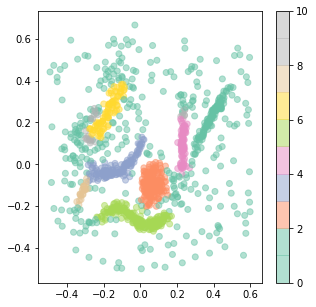

In [9]:
dbscan_obj = density.DBSCAN(data, eps=0.03, minPts=10)
dbscan_obj.fit()
labels = dbscan_obj.cluster_labels
for i in range(len(labels)):
    if labels[i] == 'noise':
        labels[i] = 0
plt.figure(figsize=(5, 5))
plt.scatter(fuzzy[::stride,0], fuzzy[::stride,1], c=labels, cmap=plt.get_cmap('Set2', dbscan_obj._n_clusters), alpha=.5)
plt.colorbar()

terminated by break condition
14 iterations until termination.
Finished after 0:00:00.012272
max within-cluster distance to center: 0.369388
mean within-cluster distance to center: 0.089326
sum of within cluster squared errors: 12.634599


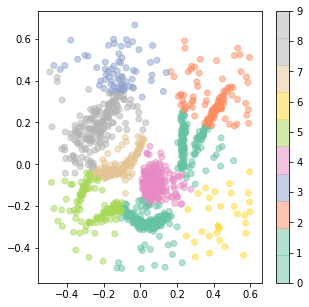

In [10]:
kmeans_obj = cl_dist.KMeans(data, 10)
kmeans_obj.fit()
labels = kmeans_obj.cluster_labels
plt.figure(figsize=(5, 5))
plt.scatter(fuzzy[::stride,0], fuzzy[::stride,1], c=labels, cmap=plt.get_cmap('Set2', k), alpha=.5)
plt.colorbar()

Constructing gaussian similarity matrix
Computing generalized Laplacian eigenproblem


KMeans initialization on eigenvectors...
terminated by break condition
12 iterations until termination.
Finished after 0:00:00.038699
max within-cluster distance to center: 0.782791
mean within-cluster distance to center: 0.060475
sum of within cluster squared errors: 9.963574
KMeans terminated. 

Finished after 0:00:12.857017


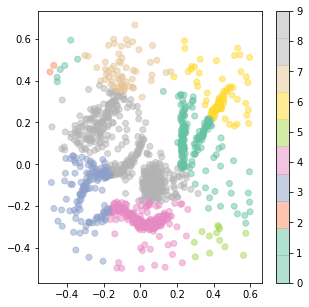

In [11]:
spectral_obj = similarity.SpectralClustering(data, n=10, bandwidth=0.1)
spectral_obj.fit()
labels = spectral_obj.cluster_labels
plt.figure(figsize=(5, 5))
plt.scatter(fuzzy[::stride,0], fuzzy[::stride,1], c=labels, cmap=plt.get_cmap('Set2', k), alpha=.5)
plt.colorbar()

Set some parameters

In [59]:
stride = 2
data = fuzzy[::stride]
n = len(data)

#clusterings = [kmeans_obj, kmeans_obj]
#clusterings = [hiercl_obj, hiercl_obj]
#clusterings = [kmeans_obj, dbscan_obj]
clusterings = [spectral_obj, dbscan_obj, kmeans_obj, hiercl_obj]
#clusterings = [spectral_obj, kmeans_obj, hiercl_obj]
#recluster_what = 'clusters'
recluster_what = 'points'
how = 'hierarchical'
#how = 'spectral'
k = 8 # how many clusters to produce

Hierarchical clustering terminated.
Finished after 0:00:05.326449
Stopping cluster number was reached.
Current number of clusters: 8
Current minimum cluster distance: 0.7
Consensus clustering terminated.
Finished after 0:00:06.360280
ANMI (average normalized mutual information) of consensus with clusterings: 0.749


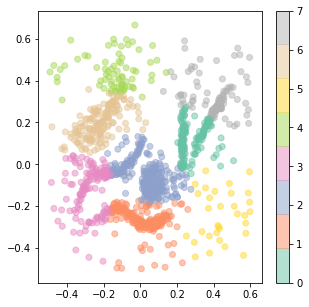

In [60]:
consensus_obj = consensus.Consensus(clusterings=clusterings, k=k, recluster_what=recluster_what, how=how)
consensus_obj.fit()
labels = consensus_obj.cluster_labels
plt.figure(figsize=(5, 5))
plt.scatter(fuzzy[::stride,0], fuzzy[::stride,1], c=labels, cmap=plt.get_cmap('Set2', k), alpha=.5)
plt.colorbar()

In [77]:
# Init
from clustertools.load_data import load_spiral_data, scale_data
data = load_spiral_data(scale = 'True')
no_labels = [0] * len(data)
num_objects = 10
dbscan_objects = [None] * num_objects
kmeans_objects = [None] * num_objects
dbscan_obj = None
kmeans_obj = None

# Fit some DBSCAN objects
eps_array = np.linspace(0.5, 1.5, num_objects)
minPts_start = 5
minPts_array = np.arange(minPts_start, minPts_start + num_objects)
for i, (eps, minPts) in enumerate(zip(eps_array, minPts_array)):
    dbscan_obj = density.DBSCAN(data, eps=eps, minPts=minPts, verbose=False)
    dbscan_obj.fit()
    dbscan_objects[i] = dbscan_obj

# Fit some KMeans objects
num_clusters_start = 2
num_clusters_array = np.arange(num_clusters_start, num_clusters_start + num_objects)
for i, k in enumerate(num_clusters_array):
    kmeans_obj = cl_dist.KMeans(data, k=k, verbose=False)
    kmeans_obj.fit()
    kmeans_objects[i] = kmeans_obj

#dbscan_obj = density.DBSCAN(data, eps=0.6, minPts=5, verbose=False)
#dbscan_labels = dbscan_obj.cluster_labels
#for i in range(len(dbscan_labels)):
#    if dbscan_labels[i] == 'noise':
#        dbscan_labels[i] = 0
#dbscan_obj2 = density.DBSCAN(data, eps=1, minPts=10, verbose=False)
#dbscan_labels2 = dbscan_obj2.cluster_labels
#for i in range(len(dbscan_labels2)):
#    if dbscan_labels2[i] == 'noise':
#        dbscan_labels2[i] = 0
#k = 3
#num_clusterings = 10
#kmeans_objects = []
#dbscan_objects = [dbscan_obj]*num_clusterings
#for i in range(num_clusterings):
#    kmeans_obj = cl_dist.KMeans(data, k=i+3, verbose=False)
#    kmeans_labels = kmeans_obj.cluster_labels
#    kmeans_objects.append(kmeans_obj)
    
#kmeans_obj = cl_dist.KMeans(data, k, verbose=False)
#kmeans_labels = kmeans_obj.cluster_labels
#kmeans_obj2 = cl_dist.KMeans(data, k, verbose=False)
#kmeans_labels2 = kmeans_obj2.cluster_labels

# Fit consensus
clusterings = [*kmeans_objects, *dbscan_objects]
#clusterings = [*kmeans_objects]
#clusterings = [kmeans_obj, dbscan_obj]
recluster_what = 'points'
how = 'spectral'
k=3
consensus_obj = consensus.Consensus(clusterings=clusterings, k=k, recluster_what=recluster_what, how=how, verbose=False)
consensus_labels = consensus_obj.cluster_labels

Computing generalized Laplacian eigenproblem


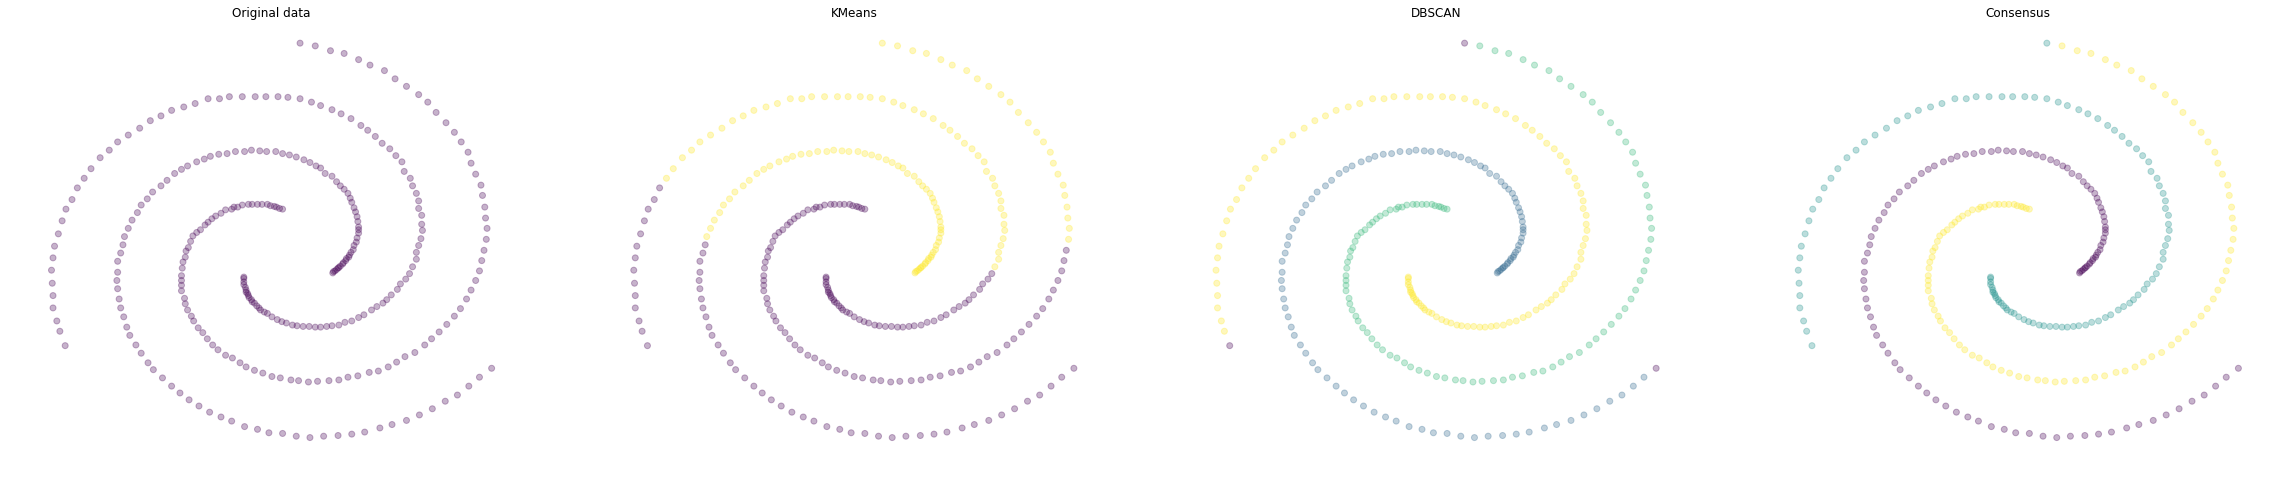

In [79]:
# Plot results
#labels = [no_labels, kmeans_labels, kmeans_labels2, dbscan_labels, dbscan_labels2, consensus_labels]
#labels = [no_labels, kmeans_labels, dbscan_labels, consensus_labels]
labels = [no_labels, kmeans_objects[0].cluster_labels, consensus_obj._noise_to_zero(dbscan_objects[0]).cluster_labels, consensus_labels]
num_plots = 4
f, axarr = plt.subplots(1,num_plots, figsize=(40,8))

for i in range(num_plots):
    axarr[i].scatter(data[:, 0], data[:, 1], alpha=.3, c=labels[i])
    axarr[i].axis('off')
    
axarr[0].set_title('Original data')
axarr[1].set_title('KMeans')
axarr[2].set_title('DBSCAN')
axarr[3].set_title('Consensus')
#axarr[4].set_title('DBSCAN2')
#axarr[5].set_title('Consensus')
plt.show()

### SHOW ALL KMeans- and DBSCAN-Objects! Because then, the effect that if one is always right leads to a good consensus, is much more clear

### The other example should be some blobs of different density.
Candidates:
+ Compound
+ Sets?

terminated by break condition
4 iterations until termination.
Finished after 0:00:00.003759
max within-cluster distance to center: 8.669856
mean within-cluster distance to center: 2.387608
sum of within cluster squared errors: 11884.158069


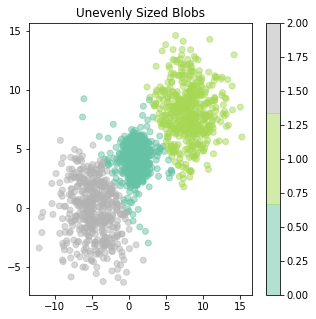

In [81]:
# Unevenly sized blobs
from sklearn.datasets import make_blobs
n_samples = 1500
random_state = 3
k=3

X, y = make_blobs(n_samples=n_samples,   cluster_std=[1.0, 2.5, 2.5], random_state=random_state)

X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:500], X[y == 2][:500]))
kmeans_obj = cl_dist.KMeans(X_filtered, k=k)

plt.figure(figsize=(5, 5))
plt.scatter(X_filtered[:,0], X_filtered[:,1], c=kmeans_obj.cluster_labels, cmap=plt.get_cmap('Set2', k), alpha=.5)
#plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=kmeans_obj.cluster_labels)
plt.colorbar()
plt.title("Unevenly Sized Blobs")

In [82]:
# Generate data (possibly put this into a function)
from sklearn.datasets import make_blobs
n_samples = 1500
random_state = 3
k=3
X, y = make_blobs(n_samples=n_samples, cluster_std=[1.5, 2.5, 2.5], random_state=random_state)
data = np.vstack((X[y == 0][:500], X[y == 1][:200], X[y == 2][:200]))

In [83]:
# Init
no_labels = [0] * len(data)
num_objects = 10
dbscan_objects = [None] * num_objects
kmeans_objects = [None] * num_objects
dbscan_obj = None
kmeans_obj = None

# Fit some DBSCAN objects
eps_array = np.linspace(0.5, 1.5, num_objects)
minPts_start = 5
minPts_array = np.arange(minPts_start, minPts_start + num_objects)
for i, (eps, minPts) in enumerate(zip(eps_array, minPts_array)):
    dbscan_obj = density.DBSCAN(data, eps=eps, minPts=minPts, verbose=False)
    dbscan_obj.fit()
    dbscan_objects[i] = dbscan_obj

# Fit some KMeans objects
num_clusters_start = 2
num_clusters_array = np.arange(num_clusters_start, num_clusters_start + num_objects)
for i, k in enumerate(num_clusters_array):
    kmeans_obj = cl_dist.KMeans(data, k=k, verbose=False)
    kmeans_obj.fit()
    kmeans_objects[i] = kmeans_obj
    
# Fit consensus
clusterings = [*kmeans_objects, *dbscan_objects]
#clusterings = [*kmeans_objects]
#clusterings = [kmeans_obj, dbscan_obj]
recluster_what = 'points'
how = 'spectral'
k = 3
consensus_obj = consensus.Consensus(clusterings=clusterings, k=k, recluster_what=recluster_what, how=how, verbose=False)
consensus_labels = consensus_obj.cluster_labels

Computing generalized Laplacian eigenproblem


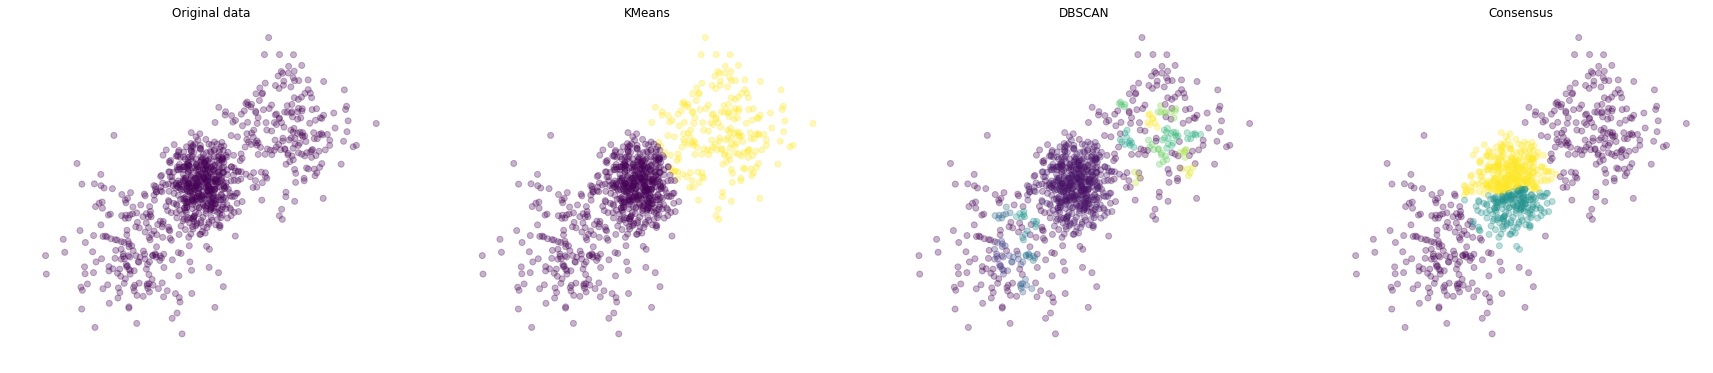

In [84]:
# Plot results
#labels = [no_labels, kmeans_labels, kmeans_labels2, dbscan_labels, dbscan_labels2, consensus_labels]
#labels = [no_labels, kmeans_labels, dbscan_labels, consensus_labels]
labels = [no_labels, kmeans_objects[0].cluster_labels, consensus_obj._noise_to_zero(dbscan_objects[0]).cluster_labels, consensus_labels]
num_plots = 4
f, axarr = plt.subplots(1,num_plots, figsize=(30,6))

for i in range(num_plots):
    axarr[i].scatter(data[:, 0], data[:, 1], alpha=.3, c=labels[i])
    axarr[i].axis('off')
    
axarr[0].set_title('Original data')
axarr[1].set_title('KMeans')
axarr[2].set_title('DBSCAN')
axarr[3].set_title('Consensus')
#axarr[4].set_title('DBSCAN2')
#axarr[5].set_title('Consensus')
plt.show()

### Also here: plot all 10 clusterings! Then it is more clear, how to choose the ranges

In [56]:
# NMI information
print(consensus_obj.anmi)
print(consensus_obj.compute_nmi(consensus_obj.cluster_labels, kmeans_obj.cluster_labels))
print(consensus_obj.compute_nmi(consensus_obj.cluster_labels, kmeans_obj2.cluster_labels))
print(consensus_obj.compute_nmi(consensus_obj.cluster_labels, consensus_obj._noise_to_zero(dbscan_obj).cluster_labels))
print(consensus_obj.compute_nmi(consensus_obj.cluster_labels, consensus_obj._noise_to_zero(dbscan_obj2).cluster_labels))

0.782500226991
1.0
1.0
0.510933494073
0.619067413892
